# Neural network for regression

## The model

We will hope to approximate the function

\begin{equation}
    f(x,y) = -(x(x-1)+y(1-y)) + \frac{1}{2} \cos(xy)\sin(2x+y),
\end{equation}

in the range $[-3,3]$ using a neural network.

In [2]:
import numpy as np

def func2approx(x,y):
    f = -(x * (x - 1) + y * (1 - y)) + 0.5 * np.cos(x * y) * np.sin(2 * x + y)
    return f

def generate_data(num_samples):
    X = np.random.rand(num_samples, 2)
    y = func2approx(X[:, 0], X[:, 1])
    return X, y

2025-11-15 19:56:18.549582: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-15 19:56:19.434331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-15 19:56:22.172948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/alex/projects/m1_work/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95:

float64
(1000, 2)
float64
(1000,)
Epoch 1/100


2025-11-15 19:56:25.308464: I external/local_xla/xla/service/service.cc:163] XLA service 0x748e8c005e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-15 19:56:25.308497: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-11-15 19:56:25.336778: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-15 19:56:25.447230: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1334 - mae: 0.3020

I0000 00:00:1763236586.128207  301187 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0646 - mae: 0.1998
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0322 - mae: 0.1479
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 - mae: 0.1441
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309 - mae: 0.1441
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 - mae: 0.1444
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309 - mae: 0.1447
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 - mae: 0.1437
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0312 - mae: 0.1452
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309 - mae: 0.1442
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0311 - mae: 0.1452
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313 - mae: 0.1450
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309 - mae: 0.1445
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

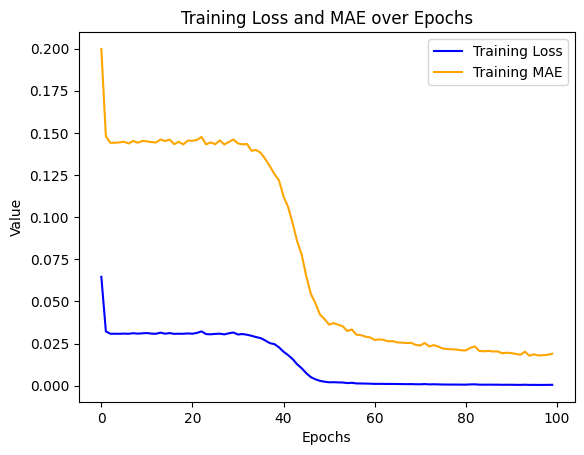

Test Loss: 0.0005479311221279204, Test MAE: 0.018784290179610252


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential([tf.keras.layers.Dense(5, activation="sigmoid", input_shape=(2,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(10, activation="sigmoid", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(1, activation="linear", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None))])

model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mae"])
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
X, y = generate_data(num_samples)
print(X.dtype)
print(X.shape)
print(y.dtype)
print(y.shape)
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['mae'], label='Training MAE', color='orange')
plt.title('Training Loss and MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# Generate test data
X_test, y_test = generate_data(200)
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

## Scanning through hyperparameters

We will use optuna to scan through different values of hyperparameters. We will use 2 hidden layers with a linear activation output layer. We will vary the number of nodes in the hidden layers (5, 10, 25, 50, 100), the activation function for each hidden layer (sigmoid, ReLU, tanh, CeLU, GELU, ELU, leaky ReLU), random weight range (0.05, 0.5, 5, 50), optimiser (Adam, SGD, SGD with momentum, RMSProp, AdaGrad), batch size (2, 4, 8, 16, 32, 64), epochs (2, 4, 8, 16, 32, 64, 128).

In [4]:
import optuna
from optuna.visualization import plot_optimization_history, plot_intermediate_values, plot_contour, plot_param_importances
from optuna.trial import TrialState

def objective(trial):

    model = Sequential([
        tf.keras.layers.Dense(trial.suggest_categorical('units1', [5, 10, 25, 50, 100]), 
                              activation=trial.suggest_categorical('activation1', ['sigmoid', 'relu', 'tanh', 'celu', 'gelu', 'elu', 'leaky_relu']), 
                              input_shape=(2,), 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-trial.suggest_categorical('weight_range', [0.05, 0.5, 5, 50]), 
                                                                                     maxval=trial.suggest_categorical('weight_range', [0.05, 0.5, 5, 50]), seed=None)),
        tf.keras.layers.Dense(trial.suggest_categorical('units2', [5, 10, 25, 50, 100]), 
                              activation=trial.suggest_categorical('activation2', ['sigmoid', 'relu', 'tanh', 'celu', 'gelu', 'elu', 'leaky_relu']), 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-trial.suggest_categorical('weight_range', [0.05, 0.5, 5, 50]), 
                                                                                     maxval=trial.suggest_categorical('weight_range', [0.05, 0.5, 5, 50]), seed=None)),
        tf.keras.layers.Dense(1, activation="linear", 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-trial.suggest_categorical('weight_range', [0.05, 0.5, 5, 50]), 
                                                                                     maxval=trial.suggest_categorical('weight_range', [0.05, 0.5, 5, 50]), seed=None))
    ])

    X_train, y_train = generate_data(800)

    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'SGD', 'RMSprop', 'Adagrad'])
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=0.01)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=0.01)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
    else:  # Adagrad
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])
    model.fit(X_train, y_train, 
              epochs=trial.suggest_categorical('epochs', [2, 4, 8, 16, 32, 64, 128]), 
              batch_size=trial.suggest_categorical('batch_size', [2, 4, 8, 16, 32, 64]), 
              verbose=0)

    X_val, y_val = generate_data(200)

    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    return val_loss, val_mae

study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=100)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

plot_optimization_history(study)
plot_intermediate_values(study)
plot_contour(study)
plot_param_importances(study)

/home/alex/projects/m1_work/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-11-15 19:56:38,060] A new study created in memory with name: no-name-f5d49f30-282f-44bf-a86a-bd7534cf24dd
/home/alex/projects/m1_work/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[W 2025-11-15 19:58:17,691] Trial 0 failed with parameters: {'units1': 25, 'activation1': 'celu', 'weight_range': 0.05, 'units2': 25, 'activation2': 'relu', 'optimizer': 'SGD', 'epochs': 128, 'batch_size': 2} because of the following error: The number of the values 2 did not 

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [],
    'layout': {'template': '...',
               'title': {'text': 'Hyperparameter Importances'},
               'xaxis': {'title': {'text': 'Hyperparameter Importance'}},
               'yaxis': {'title': {'text': 'Hyperparameter'}}}
})

In [5]:
import plotly

plot_optimization_history(study)
plot_intermediate_values(study)
plot_contour(study)
plot_param_importances(study)

[W 2025-11-15 20:22:12,670] There are no complete trials.
[W 2025-11-15 20:22:12,675] Study instance does not contain trials.
[W 2025-11-15 20:22:12,678] Your study does not have any completed trials.
[W 2025-11-15 20:22:12,680] Study instance does not contain completed trials.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [],
    'layout': {'template': '...',
               'title': {'text': 'Hyperparameter Importances'},
               'xaxis': {'title': {'text': 'Hyperparameter Importance'}},
               'yaxis': {'title': {'text': 'Hyperparameter'}}}
})